In [1]:
# resized_JAM.tar.gz

!wget "https://jimut123.github.io/blogs/CAPTCHA/data/resized_JAM.tar.gz" -O resized_JAM.tar.gz

--2020-04-10 15:57:45--  https://jimut123.github.io/blogs/CAPTCHA/data/resized_JAM.tar.gz
Resolving jimut123.github.io (jimut123.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to jimut123.github.io (jimut123.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67279 (66K) [application/gzip]
Saving to: ‘resized_JAM.tar.gz’

resized_JAM.tar.gz  100%[===================>]  65.70K  --.-KB/s    in 0.02s   

2020-04-10 15:57:45 (2.59 MB/s) - ‘resized_JAM.tar.gz’ saved [67279/67279]



In [2]:
!tar -xvf resized_JAM.tar.gz > /dev/null
! echo "Untaring... done..."

Untaring... done...


In [0]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import glob
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [4]:
png_files = glob.glob('resized_JAM/*.png')
png_files[0]

'resized_JAM/2_28.png'

In [0]:
images = []
labels = []
for item in png_files:
  #print(item)
  label = str(item.split('.')[0]).split('/')[1][0]
  #print(label)
  image = cv2.imread(item, cv2.IMREAD_UNCHANGED)
  image = image.flatten()
  images.append(image)
  labels.append(label)
  

In [0]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [0]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [0]:
images_scaled = StandardScaler().fit_transform(images)

In [0]:
pca = PCA(n_components=180)
pca_result = pca.fit_transform(images_scaled)


In [13]:
pca_result.shape

(1065, 180)

In [0]:
tsne = TSNE(n_components=2, perplexity=40.0)

In [0]:
tsne_result = tsne.fit_transform(pca_result)

In [0]:
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [0]:
def visualize_scatter_with_images(X_2d_data, images, figsize=(30,30), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()


In [0]:
def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    plt.legend(loc='best')


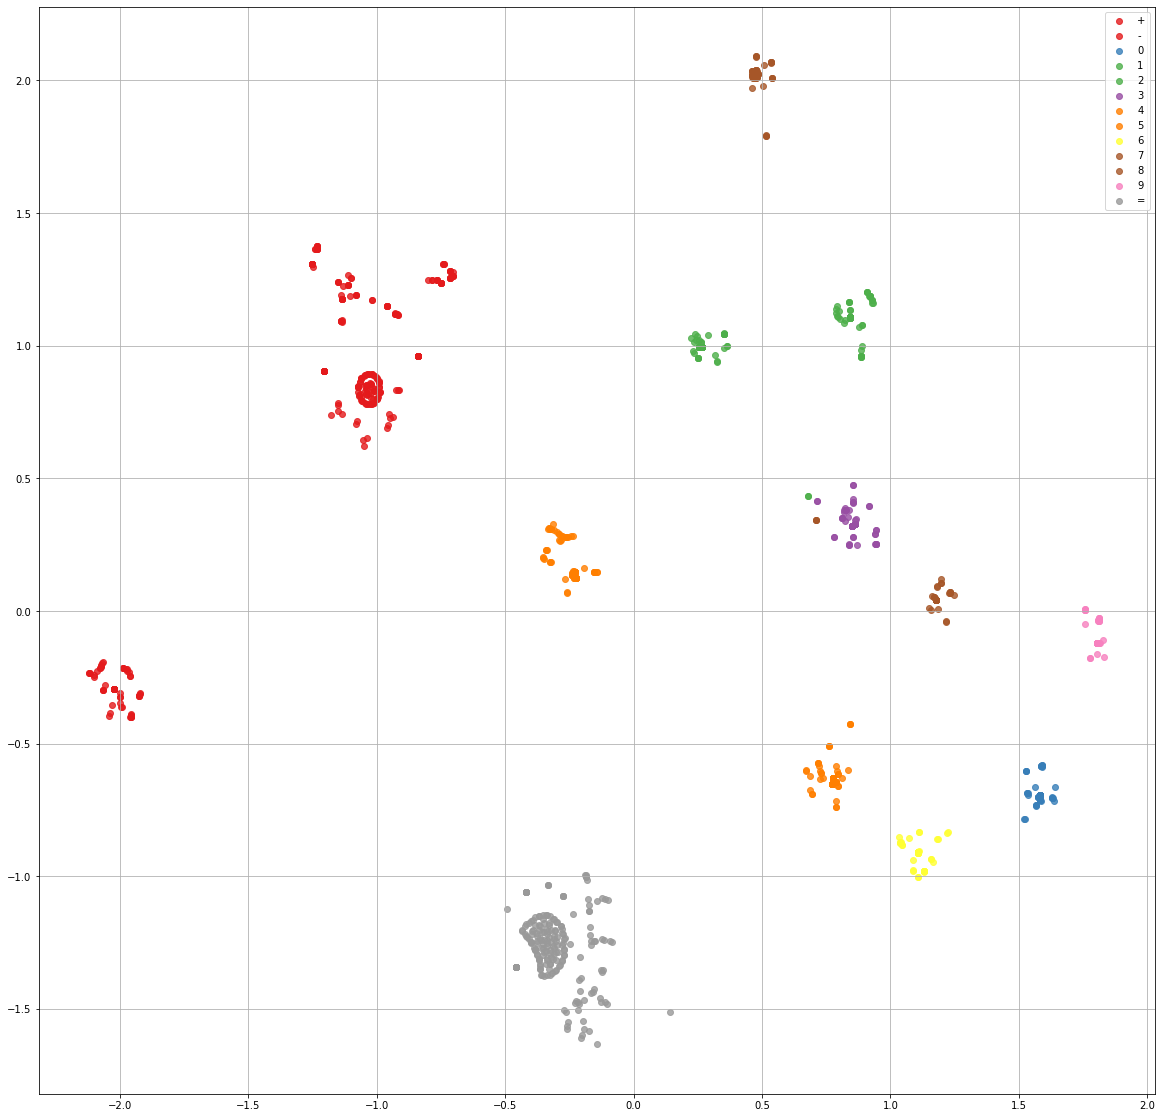

In [19]:
visualize_scatter(tsne_result_scaled, label_ids)

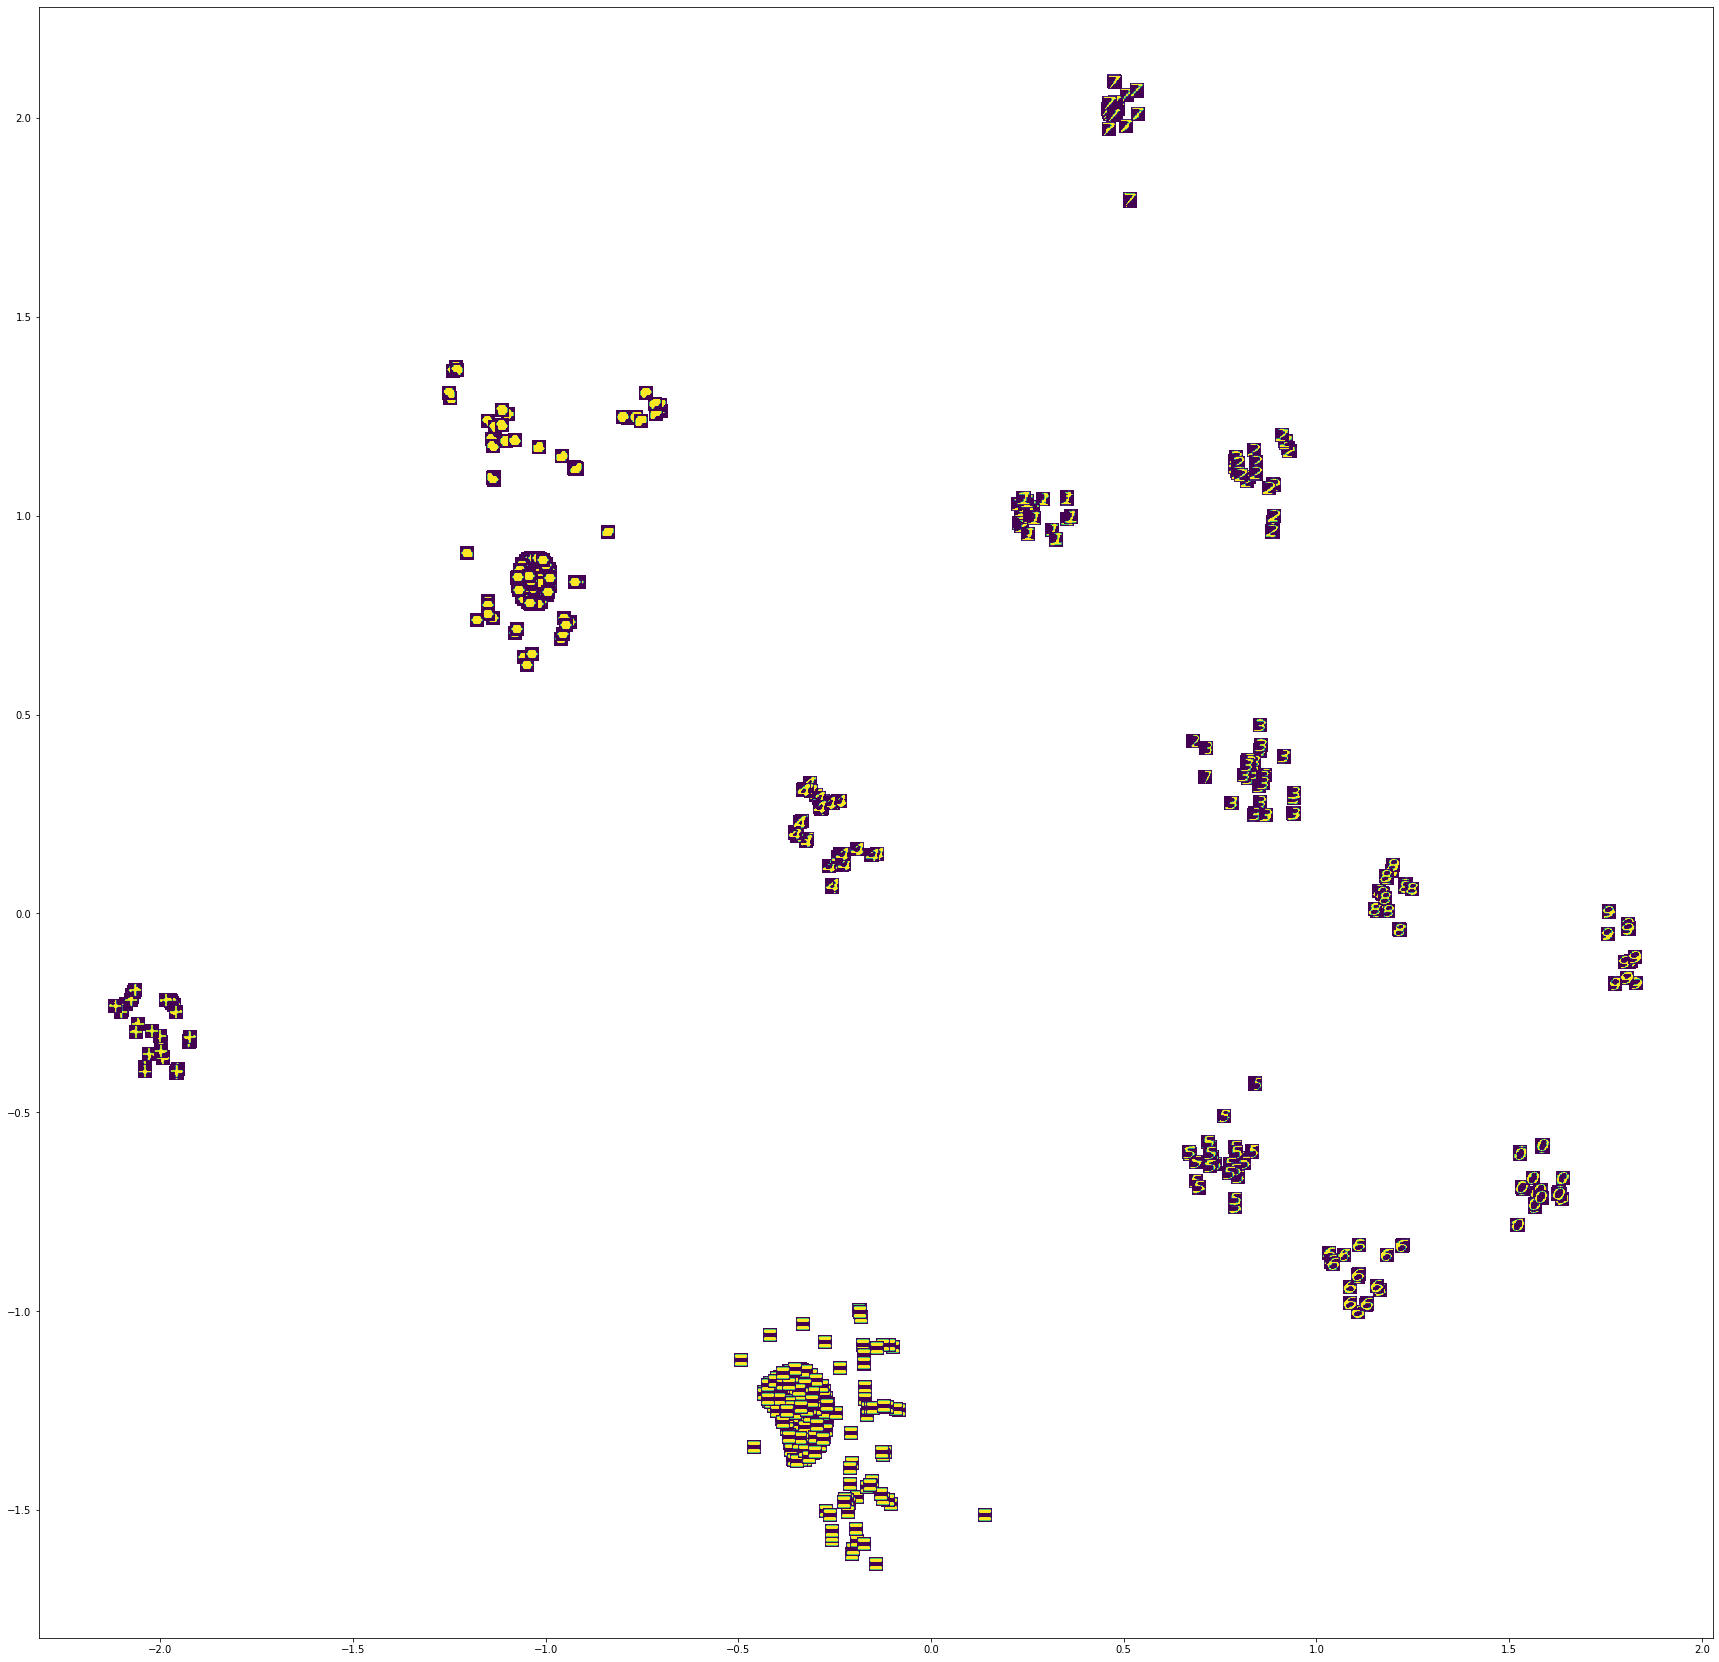

In [21]:
visualize_scatter_with_images(tsne_result_scaled, images = [np.reshape(i, (20,20)) for i in images], image_zoom=0.7)


In [0]:
tsne = TSNE(n_components=3)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)


In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation


(-2.5, 2.5)

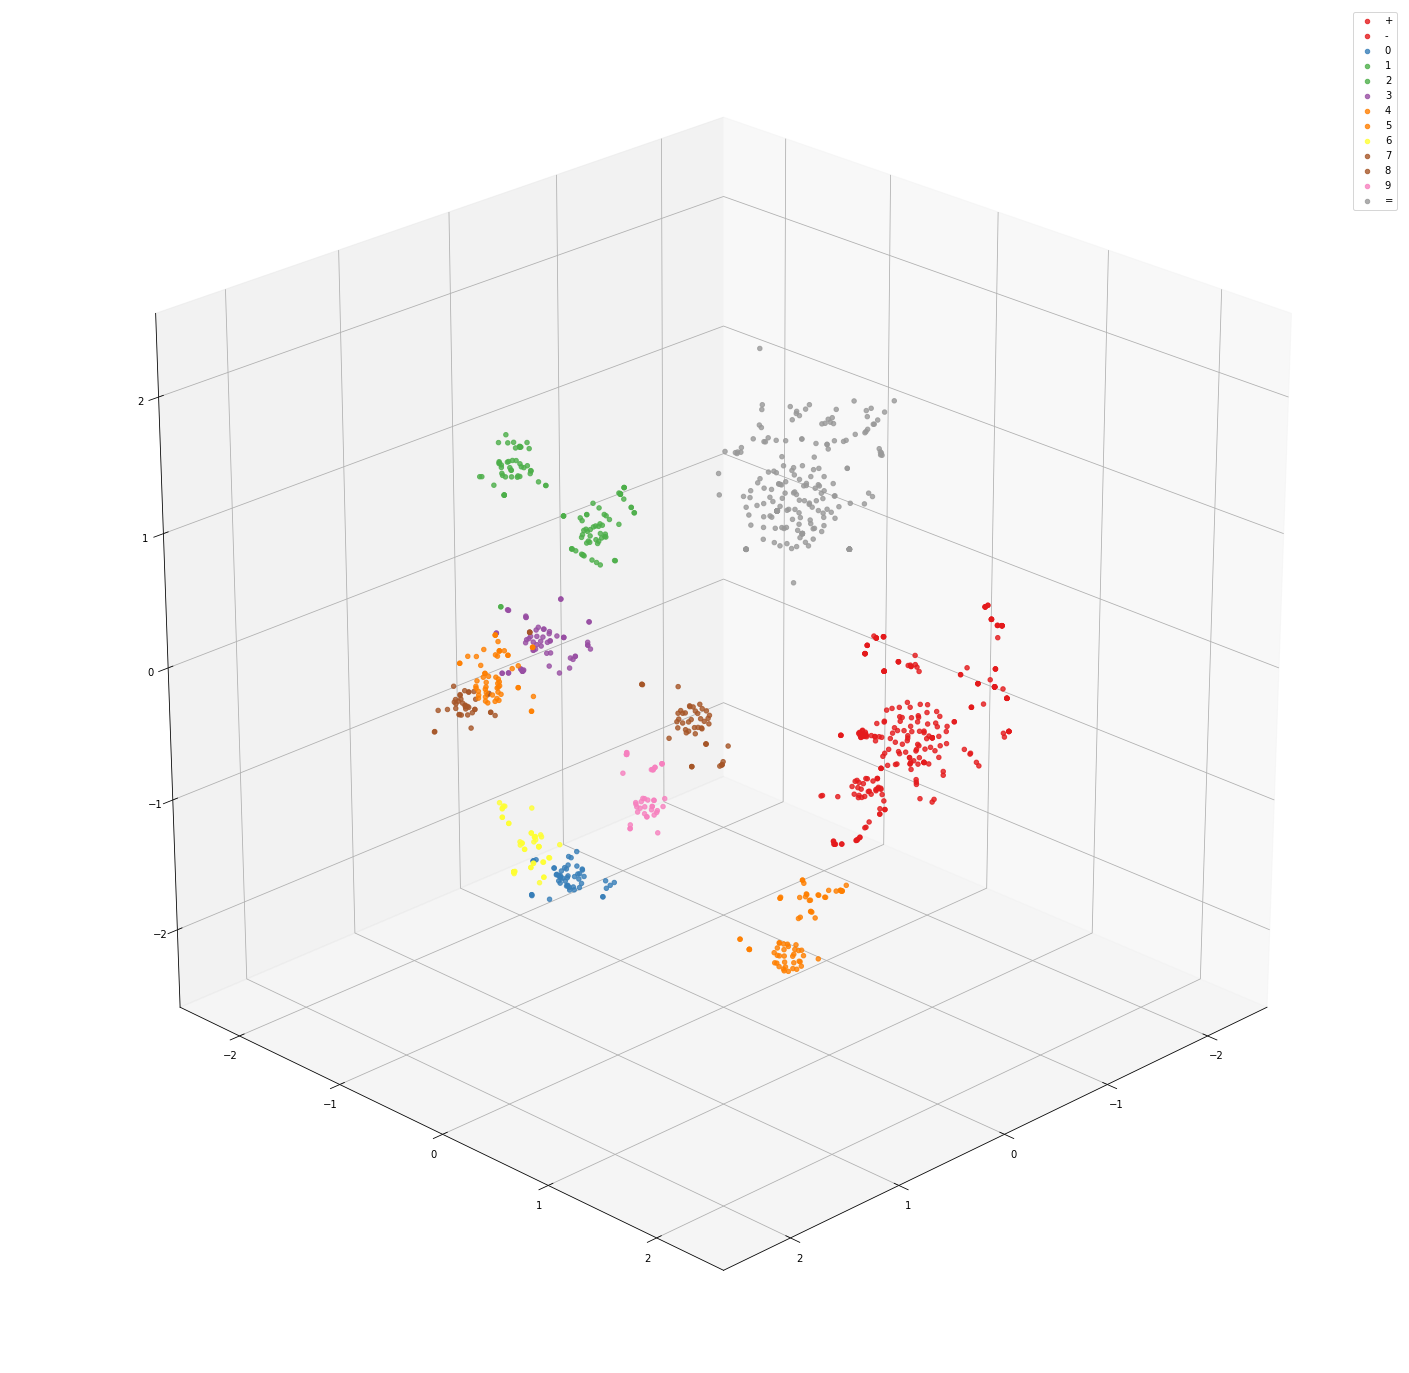

In [24]:
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111,projection='3d')

plt.grid()
    
nb_classes = len(np.unique(label_ids))
    
for label_id in np.unique(label_ids):
    ax.scatter(tsne_result_scaled[np.where(label_ids == label_id), 0],
                tsne_result_scaled[np.where(label_ids == label_id), 1],
                tsne_result_scaled[np.where(label_ids == label_id), 2],
                alpha=0.8,
                color= plt.cm.Set1(label_id / float(nb_classes)),
                marker='o',
                label=id_to_label_dict[label_id])
ax.legend(loc='best')
ax.view_init(25, 45)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)


In [0]:
anim = animation.FuncAnimation(fig, lambda frame_number: ax.view_init(30, 4 * frame_number), interval=75, frames=90)


In [0]:
#plot_3d_animation_filename = 'animation.gif'
#anim.save(plot_3d_animation_filename, writer='imagemagick')
# import qutip as q
# ani = animation.FuncAnimation(fig, animate, np.arange(len(sx)),
#                                init_func=init,  repeat=False)
# plt.show()
anim.save('JAM_t-SNE.mp4', fps=20)

In [0]:
import io
import base64
from IPython.display import HTML

video = io.open('JAM_t-SNE.mp4', 'r+b').read()
# HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(base64.b64encode(video).decode('ascii')))


In [0]:
from google.colab import files
files.download('JAM_t-SNE.mp4')